In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = '/content/keypoint.csv'
model_save_path = '/content/keypoint_classifier.hdf5'
tflite_save_path = '/content/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 23

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 23)                253       
                                                                 
Total params: 1323 (5.17 KB)
Trainable params: 1323 (5.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
32/42 [=====================>........] - ETA: 0s - loss: 3.1386 - accuracy: 0.0469
Epoch 1: saving model to /content/keypoint_classifier.hdf5
42/42 [==============================] - 4s 9ms/step - loss: 3.1327 - accuracy: 0.0514 - val_loss: 3.0979 - val_accuracy: 0.0774
Epoch 2/1000
35/42 [========================>.....] - ETA: 0s - loss: 3.0854 - accuracy: 0.0629

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /content/keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 3.0813 - accuracy: 0.0636 - val_loss: 3.0356 - val_accuracy: 0.1492
Epoch 3/1000
32/42 [=====================>........] - ETA: 0s - loss: 3.0077 - accuracy: 0.1057
Epoch 3: saving model to /content/keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 2.9970 - accuracy: 0.1029 - val_loss: 2.9283 - val_accuracy: 0.1655
Epoch 4/1000
28/42 [===================>..........] - ETA: 0s - loss: 2.9083 - accuracy: 0.1272
Epoch 4: saving model to /content/keypoint_classifier.hdf5
42/42 [==============================] - 0s 5ms/step - loss: 2.8865 - accuracy: 0.1328 - val_loss: 2.7790 - val_accuracy: 0.1946
Epoch 5/1000
33/42 [======================>.......] - ETA: 0s - loss: 2.7609 - accuracy: 0.1570
Epoch 5: saving model to /content/keypoint_classifier.hdf5
42/42 [==============================] - 0s 6ms/step - loss: 2.7496 - accuracy: 0.1603 -

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.8469


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 102ms/step
[5.6811407e-02 1.1820627e-21 1.9079419e-02 3.2448269e-02 8.3848620e-03
 2.5844562e-08 5.2009277e-06 2.5373887e-05 3.2051886e-04 1.1585542e-02
 5.5019496e-14 6.3724165e-31 5.3936952e-01 0.0000000e+00 3.5350908e-21
 4.8734925e-28 2.9838684e-03 1.6329179e-23 2.0573274e-19 5.9724222e-22
 2.4019972e-10 0.0000000e+00 3.2898599e-01]
12


# Confusion matrix

56/56 [==============================] - 0s 2ms/step


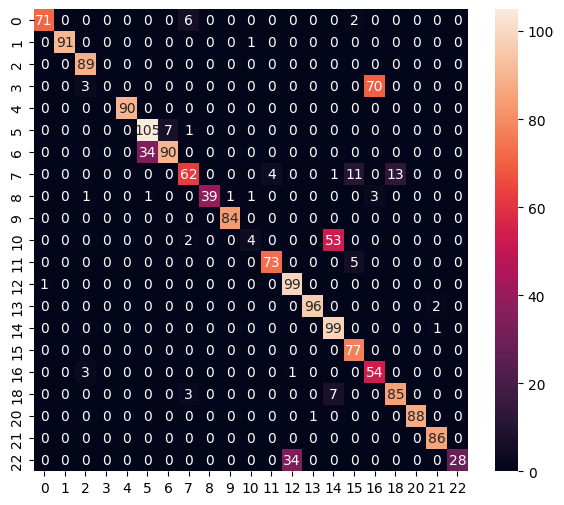

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        79
           1       1.00      0.99      0.99        92
           2       0.93      1.00      0.96        89
           3       0.00      0.00      0.00        73
           4       1.00      1.00      1.00        90
           5       0.75      0.93      0.83       113
           6       0.93      0.73      0.81       124
           7       0.84      0.68      0.75        91
           8       1.00      0.85      0.92        46
           9       0.99      1.00      0.99        84
          10       0.67      0.07      0.12        59
          11       0.95      0.94      0.94        78
          12       0.74      0.99      0.85       100
          13       0.99      0.98      0.98        98
          14       0.62      0.99      0.76       100
          15       0.81      1.00      0.90        77
          16       0.43      0.93      0.58        58
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

7380

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 70 µs, sys: 6 µs, total: 76 µs
Wall time: 93 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.6811463e-02 1.1820673e-21 1.9079383e-02 3.2448240e-02 8.3848517e-03
 2.5844466e-08 5.2009132e-06 2.5373867e-05 3.2051856e-04 1.1585522e-02
 5.5019499e-14 6.3724179e-31 5.3936958e-01 0.0000000e+00 3.5350912e-21
 4.8734925e-28 2.9838688e-03 1.6329118e-23 2.0573276e-19 5.9724233e-22
 2.4019836e-10 0.0000000e+00 3.2898602e-01]
12
